In [13]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from random import random

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
# normalize x
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

In [16]:
# we reserve the last 10000 training examples for validation
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

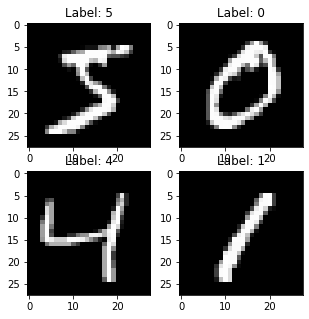

In [17]:
plt.figure(figsize=[5,5])
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

In [27]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from random import random

In [38]:
class MLP(object):
    def __init__(self, num_inputs=3, hidden_layers=[3, 3], num_outputs=2):
        self.num_inputs = num_inputs
        self.hidden_layers = hidden_layers
        self.num_outputs = num_outputs
        # create a generic representation of the layers
        layers = [num_inputs] + hidden_layers + [num_outputs]
        
        weights = []
        for i in range(len(layers)-1):
            w = np.random.rand(layers[i], layers[i+1])
            weights.append(w)
        self.weights = weights
        
        derivatives = []
        for i in range(len(layers) - 1):
            d = np.zeros((layers[i], layers[i + 1]))
            derivatives.append(d)
        self.derivatives = derivatives
        
        activations = []
        for i in range(len(layers)):
            a = np.zeros(layers[i])
            activations.append(a)
        self.activations = activations
        
    def _sigmoid(self, x):
        y = 1.0 / (1 + np.exp(-x))
        return y
    
    def _sigmoid_derivative(self, x):
        return x * (1.0 - x)
    
    def forward_propagate(self, inputs):
        activations = inputs
        self.activations[0] = activations
        for i, w in enumerate(self.weights):

            # calculate matrix multiplication between previous activation and weight matrix
            net_inputs = np.dot(activations, w)
            # apply sigmoid activation function
            activations = self._sigmoid(net_inputs)
            self.activations[i + 1] = activations

        return activations
    
    def back_propagate(self, error):
        for i in reversed(range(len(self.derivatives))):
            # get activation for previous layer
            activations = self.activations[i+1]
            # apply sigmoid derivative function
            delta = error * self._sigmoid_derivative(activations)
            # reshape delta as to have it as a 2d array
            delta_re = delta.reshape(delta.shape[0], -1).T
            # get activations for current layer
            current_activations = self.activations[i]
            # reshape activations as to have them as a 2d column matrix
            current_activations = current_activations.reshape(current_activations.shape[0],-1)
            # save derivative after applying matrix multiplication
            self.derivatives[i] = np.dot(current_activations, delta_re)
            # backpropogate the next error
            error = np.dot(delta, self.weights[i].T)
        
    def train(self, X_train, y_train, epochs, learning_rate):
        for i in range(epochs):
            sum_errors = 0

            # iterate through all the training data
            for j, x in enumerate(X_train):
                y = y_train[j]

                # activate the network!
                output = self.forward_propagate(x)

                error = y - output

                self.back_propagate(error)
                self.gradient_descent(learning_rate)

                # keep track of the MSE for reporting later
                sum_errors += self._mse(y, output)

            # Epoch complete, report the training error
            print("Error: {} at epoch {}".format(sum_errors / len(X_train), i+1))

        print("Training complete!")
        print("=====")
            
        
    def gradient_descent(self, learningRate=1):
        # update the weights by stepping down the gradient
        for i in range(len(self.weights)):
            weights = self.weights[i]
            derivatives = self.derivatives[i]
            weights += derivatives * learningRate
        
    def _mse(self, target, output):
    
        return np.average((target - output) ** 2)
if __name__ == "__main__":
    items = np.array([[random()/2 for _ in range(2)] for _ in range(1000)])
    targets = np.array([[i[0] + i[1]] for i in items])
    mlp = MLP(2,[5],1)
    mlp.train(items, targets, 30, 0.1)
    output = mlp.forward_propagate(input)
    print()
    print("Our network believes that {} + {} is equal to {}".format(input, output))

In [45]:
mlp = MLP(784,[512,256,128,64,32],1)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# normalize x
new_train = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0]), new_train)//255
X_test = X_test.reshape((X_test.shape[0]), new_train)//255
print("train data")
train = mlp.train(X_train[:1000], y_train[:1000],10,0.1)
print("test data")
test = mlp.train(X_test[:500], y_test[:500],10,0.1)

In [36]:
if __name__ == "__main__":
    mlp = MLP(2,[5],1)
    input = X_train
    target = y_train
    mlp.train(items, targets, 30, 0.1)
    output = mlp.forward_propagate(input)
    print()
    print("Our network believes that {} + {} is equal to {}".format(input, output))

Error: 0.06372272113235573 at epoch 1
Error: 0.04038238691897458 at epoch 2
Error: 0.040093722379410696 at epoch 3
Error: 0.03976502496569964 at epoch 4
Error: 0.03936593941697196 at epoch 5
Error: 0.03886218119208271 at epoch 6
Error: 0.03821378006616597 at epoch 7
Error: 0.03737462352773131 at epoch 8
Error: 0.03629368341959141 at epoch 9
Error: 0.03491900225062892 at epoch 10
Error: 0.033205544410645445 at epoch 11
Error: 0.03112725435664055 at epoch 12
Error: 0.02869157699194805 at epoch 13
Error: 0.025951501283895815 at epoch 14
Error: 0.023007884123747498 at epoch 15
Error: 0.0199967275605684 at epoch 16
Error: 0.01706335494171835 at epoch 17
Error: 0.014333521314911618 at epoch 18
Error: 0.011893308569549597 at epoch 19
Error: 0.009783609566983079 at epoch 20
Error: 0.008006852781396918 at epoch 21
Error: 0.006539452784826617 at epoch 22
Error: 0.005344183228801715 at epoch 23
Error: 0.00437950736570114 at epoch 24
Error: 0.003605341834391116 at epoch 25
Error: 0.002985953857081

ValueError: shapes (60000,28,28) and (2,5) not aligned: 28 (dim 2) != 2 (dim 0)